# Marketing Mix Modeling in Python

![banner](https://raw.githubusercontent.com/MayumyCH/marketing_mix_modeling_project_python/main/resources/banner.jpeg)

_Este proyecto propone el análisis de la data proporcionada por Kaggle para el área de Marketing; se busca encontrar **"Qué inversión publicitaria impulsa** realmente **las ventas"**._

In [107]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

import plotly.express as px

## 1. FUNCIONES


In [108]:
def analizador_nulos(data):
    nFilas, nColumnas = data.shape
    if data.isnull().any().any(): # Devuelve True si alguno es True
        print( "\n TABLA DE DATOS NULOS")
        tablaNulos = pd.DataFrame(pd.concat([
                                             data.isnull().any(), 
                                             data.isnull().sum(), 
                                            round(data.isnull().sum() / nFilas * 100, 2), 
                                             data.dtypes], axis=1))
        tablaNulos.columns = ['Nulos', 'Cantidad', '%_Nulos', 'Tipo_Dato']
        tablaNulos.sort_values(by='%_Nulos', ascending = False, inplace = True)
        display(tablaNulos[tablaNulos['Cantidad'] > 0])
    else:
        print("No existen Nulos")

## 2. Comprensión de los datos


Este [dataset](https://www.kaggle.com/harrimansaragih/dummy-advertising-and-sales-data) se encuentra en Kaggle. Este contiene 5 variables los cuales se detalla a continuación:


| VARIABLE | DESCRIPCIÓN                |
| :-------- | :------------------------- |
| Date |  Fecha |
| TV |  Presupuesto de promoción televisiva (en millones) |
| Radio |  Presupuesto de promoción radiofónica (en millones) |
| Banners |  Presupuesto de promoción banners WEB (en millones)|
| Sales |  Ventas (en millones) |

In [109]:
# IMPORTAR los datos desde Jupyter
url_data = "dataset/datasetMedium.csv"

# Importar los datos desde un link
#url_data = "https://raw.githubusercontent.com/MayumyCH/marketing_mix_modeling_project_python/main/dataset/data_marketing.csv"

data_Marketing = pd.read_csv(url_data, delimiter=',',parse_dates = ['Date'],index_col = 'Date')

# data_Marketing.tail()
data_Marketing.head()
# data_Marketing.sample(5)

,TV,Radio,Banners,Sales
Date,,,,
2018-01-07,13528.1,0.00,0.00,9779.80
2018-01-14,0.0,5349.65,2218.93,13245.19
2018-01-21,0.0,4235.86,2046.96,12022.66
2018-01-28,0.0,3562.21,0.00,8846.95
2018-02-04,0.0,0.00,2187.29,9797.07


In [110]:
data_Marketing.shape

# INTERPRETACION:
# 200 observaciones
# 5 features/variables

(200, 4)

In [111]:
# CANTIDAD DE NULOS POR CADA FEATURE
analizador_nulos(data_Marketing)

# INTERPRETACION:
# No hay datos nulos

No existen Nulos


In [112]:
# Veamos CUANTAS SEMANAS NO hubo INVERSION en TV

sinInversionTV =  data_Marketing[data_Marketing['TV'] == 0.0]
sinInversionTV.shape[0] / data_Marketing.shape[0]
# 142 <> 71% semanas sin publicidad en TV

sinInversionRADIO =  data_Marketing[data_Marketing['Radio'] == 0.0]
sinInversionRADIO.shape[0] / data_Marketing.shape[0]
# 108 <> 54% semanas sin publicidad en RADIO

0.54

## Analisis exploratorios ( EDA)

In [113]:
data_Marketing.info()

# INTERPRETACION:
# 4 Features tipo Numericos (float)
# 1 Features tipo Categorico (object)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200 entries, 2018-01-07 to 2021-10-31
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TV       200 non-null    float64
 1   Radio    200 non-null    float64
 2   Banners  200 non-null    float64
 3   Sales    200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [114]:
# DESCRIPCION DE LOS DATOS NUMERICOS
# data_Marketing.describe().T 
data_Marketing.describe()
# Nota en este caso solo se veran los describes de las variables numericas!

,TV,Radio,Banners,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,2946.207650,2213.585050,1520.722550,10668.141500
std,4749.646908,2505.967886,870.764354,2700.706683
min,0.000000,0.000000,0.000000,4532.330000
25%,0.000000,0.000000,1657.195000,8396.942500
50%,0.000000,0.000000,1918.990000,10853.105000
75%,7938.527500,4624.027500,2069.767500,12566.995000
max,13901.550000,7696.220000,2518.880000,17668.340000


In [115]:
# Interpretación 
# Variable "Sales"
# El 50% de las ventas conseguidas con las campañas de marketing estan entre [112.32 - 272.50] millones de dolares

# Variable "Social Media"
# El 75% de los casos invirtieron menos de 4.8 millones en publicidad

# Se observa que la variable que tiene mas dispersion es la TV 
# STD: Mide cuanto se dispersan los datos de su valor promedio

In [116]:
# DESCRIPCION DE LOS DATOS CATEGORICOS
# data_Marketing.describe(include = 'object')
# data_Marketing.describe(include="all")

In [117]:
data_Marketing.corr()
# OBSERVACION
# Sales con TV tienen una alta correlación 0.99
# Sales con Radio tienen una correlación de 0.86
# Sales con Social Media tienen una correlación 0.53

#NOTA: Cuando 2 variables tiene una correlacion > 0.6 ya es significativa (Mas cercano a 1 o -1)
# Observacion se ve que la Tv con la Radio estan relacionados tambien !

,TV,Radio,Banners,Sales
TV,1.000000,0.084128,0.021735,0.679205
Radio,0.084128,1.000000,-0.100946,0.466762
Banners,0.021735,-0.100946,1.000000,0.360046
Sales,0.679205,0.466762,0.360046,1.000000


<AxesSubplot:>

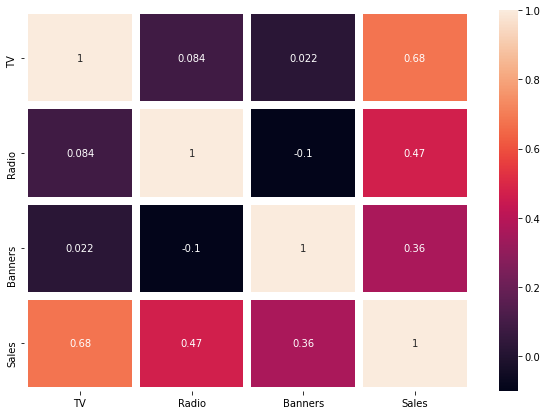

In [118]:
# CORRELACION DE MIS VARIABLES
plt.figure(figsize=(10,7))
sns.heatmap(data_Marketing.corr(),annot=True, linewidths=8)

In [119]:
data_Marketing.corr()

,TV,Radio,Banners,Sales
TV,1.000000,0.084128,0.021735,0.679205
Radio,0.084128,1.000000,-0.100946,0.466762
Banners,0.021735,-0.100946,1.000000,0.360046
Sales,0.679205,0.466762,0.360046,1.000000


In [120]:
px.imshow(data_Marketing.corr(),
          color_continuous_scale='RdBu_r',
          labels=dict(x="x", y="y", color="Nro Correlación")
          )

In [121]:
import plotly.express as px
df = px.data.tips()
# fig = px.histogram(data_Marketing, x="Sales", histnorm='probability density')
fig = px.histogram(data_Marketing, x="Sales", nbins=20)
fig.show()

In [122]:
df = px.data.tips()
# fig = px.histogram(data_Marketing, x="Sales", histnorm='probability density')
fig = px.histogram(data_Marketing, x="Sales", nbins=20)
fig.show()

In [123]:
import plotly.express as px
 
fig = px.box(data_Marketing, x = "Sales",points="outliers",notched=True)
# fig.update_traces(quartilemethod="inclusive")
 
fig.show()

In [124]:
fig = px.scatter(
    data_Marketing, x='TV', y='Sales', opacity=0.65, trendline='ols', trendline_color_override='darkblue',
    marginal_x="histogram", marginal_y="histogram",
    title='Grafico de TV vs Sales')
fig.show()

## Modelo: Regresión Lineal Multiple
Representante más simple de los modelos aditivos!

Nuestra regresión multiple se veria de la sgte forma:

> $Y_{Sales} = Base + a(X_{Tv}) + b( X_{Radio}) + c( X_{Banners}$)


In [125]:
target = 'Sales'
predictoras = ['TV','Radio','Banners']

In [126]:
X = data_Marketing[predictoras]
y = data_Marketing[target]

In [127]:
# Generamos el conjunto de train y test gracias a sklearn
from sklearn.model_selection import train_test_split, cross_val_score
# Importamos el Modelo de Regresion Lineal
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
# Creamos el modelo de la regresion
lm = LinearRegression() # Creando un objeto de Regresión Lineal 'lm'
# Entrenamiento del modelo
lm.fit(X_train, y_train)

LinearRegression()

In [128]:
print("La intersección del modelo lineal:", lm.intercept_)
print("Los coeficientes del modelo lineal:", lm.coef_)

La intersección del modelo lineal: 6619.78632589639
Los coeficientes del modelo lineal: [0.33748355 0.55753758 1.20353802]


El modelo quedara del sgte modo:
> $Y_{Sales} = 6619.79 + 0.34(X_{Tv}) + 0.56( X_{Radio}) + 1.20( X_{Social Media}$)

**Interpretación:**

*   Si no invertimos en publicidad en radio ni Social Media podremos decir que: Por cada aumento en una unidad de **la inversion en publicidad en la Tv**, el **total de ventas del producto** aumentará en **3.5 millones de dolares**.
*   Si no invertimos en publicidad en tv ni Social Media podremos decir que: Por cada aumento en una unidad de **la inversion en publicidad en la radio**, el **total de ventas del producto** aumentará en **0.02 millones de dolares**.
*   Cuando las variables predictoras sean 0, el **total de ventas del producto** es de 0.39 millones de dolares


In [129]:
# Predecimos la data de entrenamiento y la data del test
train_pred=lm.predict(X_train)
test_pred=lm.predict(X_test)

In [130]:
# Visualizaremos el ENTRENAMIENTO y la PREDICCION
# -----------------------------------------------
df_train= pd.concat([X_train, y_train], axis = 1).head() # DATA REAL DE ENTRENAMIENTO
df_train['Sales Predict'] = train_pred[:5] # LA PREDICIÓN DE ENTRENAMIENTO
df_train

,TV,Radio,Banners,Sales,Sales Predict
Date,,,,,
2019-07-28,0.00,0.00,0.00,5023.53,6619.786326
2020-01-26,0.00,7021.04,0.00,10862.91,10534.279943
2020-03-01,0.00,4482.48,2093.68,12279.80,11638.760838
2020-10-18,11888.96,0.00,1892.17,13368.12,12909.413296
2018-03-04,0.00,3156.93,1859.02,12199.37,10617.294673


El modelo quedara del sgte modo:
-- 2020-10-18--
> $Y_{Sales} = 6619.79 + 0.34(11888.96) + 0.56(0) + 1.20(1892.17)$

In [132]:
# Ejemplo manual # 2020-10-18 SALES PREDICT
y_example = 6619.78632589639 + 0.33748355*(11888.96) + 0.55753758*(0) + 1.20353802*(1892.17)
y_example

12909.413287807789

In [133]:
# DIFERENCIA entre el VALOR ORIGINAL VS PREDICHO !!
13368.12 - 12909.413287807789

458.70671219221185

Como se observa de lo predecido al valor real existe una diferencia de 641.0

In [134]:
coefTV = 0.34
xTV = 11888.96
valTV = coefTV*(gastoTV)
valTV # Contribucion no ajustada de la television

4042.2464

Contribución (no ajustada) de la televisión:
> $coef_{Tv} * (X_{Tv}) = 0.34(11888.96) =4042.2464$

In [135]:
correctFactor = 13368.12 / 12909.413296
correctFactor

1.0355327305340927

Multipliquemos las contribuciones y la línea de base por un factor de corrección
> $correctFactor = \frac{Y_{sales}}{Y_{salesPredict}} = \frac{13368.12}{12909.413296}  \approx 1.04$

In [136]:
contTV = correctFactor*valTV
contTV

4185.878452083606

Entonces la contribucion de la Tv es:
    
> $Contribucion_{Tv} = correctFactor * (4042.2464) = 1.04* (4042.2464) =4185.878452083606$

In [137]:
valRadio = 0.56*(0) # Contribucion no ajustada de la Radio
valSocialMedia = 1.20*(1892.17) # Contribucion no ajustada de la SocialMedia
contRadio = correctFactor*valRadio
contSocialMedia = correctFactor*valSocialMedia
contBase = correctFactor*6619.78

In [138]:
contSocialMedia + contRadio + contTV + contBase

13392.162071100214

In [154]:
# Genear el grafico de Contribución
X
# pesos

,TV,Radio,Banners
Date,,,
2018-01-07,13528.10,0.00,0.00
2018-01-14,0.00,5349.65,2218.93
2018-01-21,0.00,4235.86,2046.96
2018-01-28,0.00,3562.21,0.00
2018-02-04,0.00,0.00,2187.29
...,...,...,...
2021-10-03,0.00,0.00,1691.68
2021-10-10,11543.58,4615.35,2518.88
2021-10-17,0.00,4556.16,1919.19


In [152]:
pesos = pd.Series(
    lm.coef_,
    index=X.columns
)
pesos # name variable - peso de la variable

base = lm.intercept_
base

unadj_contributions = X.mul(pesos).assign(Base=base) # x*pesos y agregando el intercepto
unadj_contributions

unadj_contributions.sum(axis=1) # sumar por fecha
# Division de lo invertido en cada variable / Total de lo invertido
unadj_contributions.div(unadj_contributions.sum(axis=1), axis=0)

adj_contributions = (unadj_contributions
                    .div(unadj_contributions.sum(axis=1), axis=0)
                    .mul(y, axis=0) # Al resultado se le multiplica por las ventas obtenidas por fecha
                    ) 
# contiene todas las contribuciones para cada día 
# adj_contributions

In [166]:
# unadj_contributions
# unadj_contributions.div(unadj_contributions.sum(axis=1), axis=0)
adj_contributions

,TV,Radio,Banners,Base
Date,,,,
2018-01-07,3991.828242,0.000000,0.000000,5787.971758
2018-01-14,0.000000,3218.900421,2882.115935,7144.173644
2018-01-21,0.000000,2480.843156,2587.931274,6953.885570
2018-01-28,0.000000,2041.706670,0.000000,6805.243330
2018-02-04,0.000000,0.000000,2787.494082,7009.575918
...,...,...,...,...
2021-10-03,0.000000,0.000000,2124.062875,6906.107125
2021-10-10,3843.509281,2538.712902,2990.901426,6530.986391
2021-10-17,0.000000,2843.524354,2585.601730,7410.163915


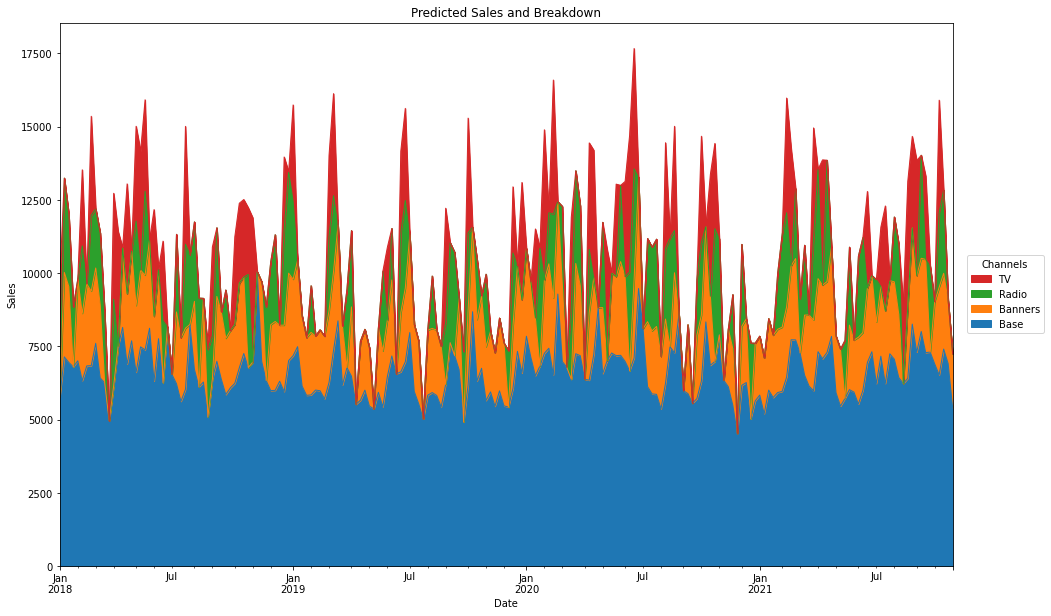

In [158]:
ax = (adj_contributions[['Base', 'Banners', 'Radio', 'TV']]
        .plot.area(
            figsize=(16, 10),
            linewidth=1,
            title='Predicted Sales and Breakdown',
            ylabel='Sales',
            xlabel='Date')
    )
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[::-1], labels[::-1],
    title='Channels', loc="center left",
    bbox_to_anchor=(1.01, 0.5)
)

Podemos ver que la línea de base es de alrededor de 6500 ventas diarias,
los banners y la radio contribuyen en promedio alrededor de 2500 cuando están
activos y la televisión alrededor de 3500 cuando está activo. ¡Bonito!

## Calcular el retorno de la inversión (ROI)

Ahora podemos determinar qué canal fue el mejor en términos de ROI, un número
que mide la eficiencia. La fórmula es simple

> $channel ROI = \frac{Ventas canal}{Gasto canal}$

In [171]:
# En el ROI de la TV
sales_from_tv = adj_contributions['TV'].sum() # VENTAS POR ANUNCIO TV
spendings_on_tv = data_Marketing['TV'].sum() # GASTO EN TV

tv_roi = sales_from_tv / spendings_on_tv
# print(sales_from_tv, spendings_on_tv)
print(tv_roi)

0.34191451170499787


"_Por cada euro que gastamos en televisión,recuperamos 34 centavos_".

**NOTA:**
> **Un ROI menor que 1 significa que el canal tuvo un desempeño deficiente**

In [172]:
# ROI RADIO
sale_from_radio = adj_contributions['Radio'].sum()
spendings_on_radio = data_Marketing['Radio'].sum()
radio_roi = sale_from_radio / spendings_on_radio

# ROI BANNERS
sale_from_banners = adj_contributions['Banners'].sum()
spendings_on_banners = data_Marketing['Banners'].sum()

banners_roi = sale_from_banners / spendings_on_banners
print(radio_roi,banners_roi)

0.549023865554984 1.2040405739739544


### CONCLUSIONES
- Ese es un tipo de trato que no queremos hacer con demasiada frecuencia si queremos
que la empresa sobreviva
- Los banners tienen un ROI de 1.21; este canal funcionó bastante bien en el tiempo que registra la data
- En el caso que invirtamos un Euro tendremos como recuperación:
    - 34 centavos por TV
    - 54 centavos por RADIO
    - 1.2 centavos por BANNERS
    
> **Este modelo es demasiado simple para capturar la realidad, lo que crea
muchos problemas. Pero aprenderemos a eludirlos haciendo que el modelo sea un
poco más complejo, pero aún interpretable**